In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

plt.rcParams['svg.fonttype'] = 'none'

In [15]:
### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Volumes/Aidan_NYGC/mouse_colon/csplotch_anndata'
adata_lambdas = sc.read_h5ad(os.path.join(data_dir, 'adata_csplotch_lambdas.h5ad'))

### REPLACE with path to AnnData downloaded from GCP ###
data_dir = '/Users/aidandaly/NYGC Dropbox/Aidan Daly/cell_segmentation_colon/snrna_anndata/'
adata_snrna = sc.read_h5ad(os.path.join(data_dir, 'adata_larger_relabeling_after_tsne_stemfiltered_renamed.h5ad'))

In [ ]:
# Rename TA7 to TA6 (there is no TA6 currently)
cats = adata_snrna.obs.pheno_cell_types.cat.categories.values
cats[cats == 'TA_7'] = 'TA_6'

adata_snrna.rename_categories('pheno_cell_types', cats)
adata_snrna.obs.pheno_cell_types.cat.categories

In [5]:
cmap = cm.get_cmap('tab20')
pmaj_colors = {
    'B': cmap(0),
    'Colonocyte': cmap(0.1),
    'Cycling': cmap(0.2),
    'Enteroendocrine': cmap(0.3),
    'Fibroblast': cmap(0.4),
    'Glia': cmap(0.5),
    'Goblet': cmap(0.6),
    'Lymphatic': cmap(0.8),
    'Macrophage': cmap(0.9),
    'Mesothelial': cmap(0.05),
    'SMC': cmap(0.15),
    'Neuron': cmap(0.25),
    'Stem': cmap(0.35),
    'T': cmap(0.45),
    'TA': cmap(0.55),
    'Tuft': cmap(0.65),
    'Vascular': cmap(0.85)
}

In [6]:
p_colors = {
    'B_cell': (244,233,44,255),
    'Colonocyte_1': (103,196,216,255),
    'Colonocyte_2': (174,85,146,255),
    'Cycling_TA_1': (222,73,72,255),
    'Cycling_TA_2': (16,128,64,255),
    'Enteroendocrine_1': (25,101,148,255),
    'Enteroendocrine_2': (145,36,82,255),
    'Fibroblast_1': (248,216,222,255),
    'Fibroblast_2': (106,69,35,255),
    'Glia': (40,48,120,255),
    'Goblet': (132,195,144,255),
    'Lymphatic': (173,145,94,255),
    'Macrophage': (20,68,60,255),
    'Mesothelial': (147,167,202,255),
    'Myocyte_1': (143,119,124,255),
    'Myocyte_2': (66,22,24,255),
    'Neuron_1': (122,144,137,255),
    'Neuron_2': (92,54,66,255),
    'Neuron_3': (38,61,33,255),
    'Neuron_4': (88,177,70,255),
    'Stem_1': (74,92,153,255),
    'Stem_2': (65,53,68,255),
    'TA_1': (220,53,115,255),
    'TA_2': (90,90,81,255),
    'TA_3': (167,37,41,255),
    'TA_4': (101,115,53,255),
    'TA_5': (47,177,144,255),
    'TA_6': (239,163,140,255),
    'T_cell': (232,139,175,255),
    'Tuft': (153,54,130,255),
    'Vascular': (192,93,45,255)
}
for k,v in p_colors.items():
    p_colors[k] = np.array(v)/255

In [7]:
mroi_short2long = {
    'APEX': 'crypt apex',
    'MID': 'crypt mid',
    'BASE': 'crypt base',
    'SUB-CRYPT': 'sub-crypt',
    'PP': "peyer's patch",
    'CM': 'cross-mucosa',
    'EMM': 'epithelium and mucosae',
    'EMMSUB': 'epithelium and mucosae and submucosa',
    'ALL': 'epithelium and muscle and submucosa',
    'ME': 'externa',
    'MEI': 'externa and interna',
    'MI': 'interna',
    'MMI': 'interna and mucosae',
    'MSUB': 'muscle and submucosa'
}
mroi_colors = {
    'MEI': (228,219,159,255),
    'ME': (183,172,150,255),
    'MI': (204,165,164,255),
    'MMI': (214,188,210,255),
    'MSUB': (206,176,204,255),
    'APEX': (241,149,187,255),
    'BASE': (188,165,197,255),
    'MID': (163,163,198,255),
    'PP': (154,161,196,255),
    'SUB-CRYPT': (165,215,235,255),
    'CM': (179,221,214,255),
    'ALL': (179,221,214,255),
    'EMMSUB': (171,217,185,255),
    'EMM': (162,193,160,255)
}
for k,v in mroi_colors.items():
    mroi_colors[k] = np.array(v)/255

### Fig 1: breakdown of snRNA-seq dataset by cell type

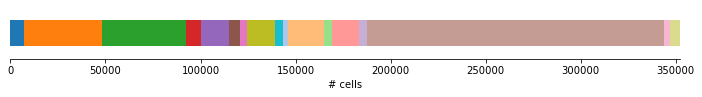

In [161]:
counts_per_type = {}
for ct in pmaj_colors.keys():
    assert ct in adata_snrna.obs['pheno_major_cell_types'].values, ct
    counts_per_type[ct] = [np.sum(adata_snrna.obs['pheno_major_cell_types'] == ct)]

df_cpt = pd.DataFrame(counts_per_type)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,1.5), color=pmaj_colors, legend=False)
#ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('# cells')
ax.set_xlim(0, len(adata_snrna.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_sndata_composition_k17.svg')

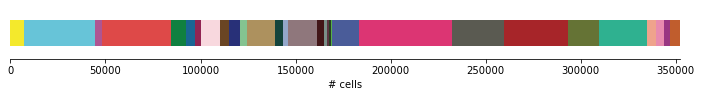

In [164]:
counts_per_type = {}
for ct in p_colors.keys():
    assert ct in adata_snrna.obs['pheno_cell_types'].values, ct
    counts_per_type[ct] = [np.sum(adata_snrna.obs['pheno_cell_types'] == ct)]

df_cpt = pd.DataFrame(counts_per_type)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,1.5), color=p_colors, legend=False)
#ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('# cells')
ax.set_xlim(0, len(adata_snrna.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_sndata_composition_k31.svg')

### Fig 1: breakdown of ST dataset by age and colon region

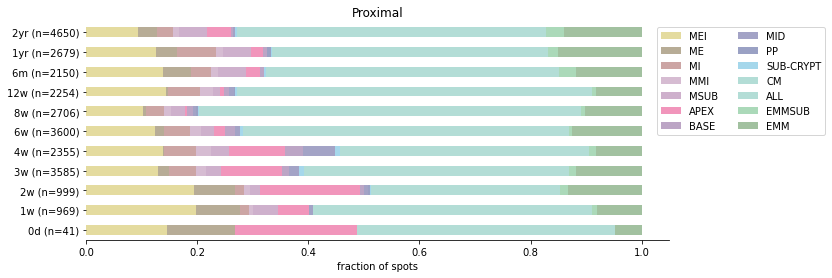

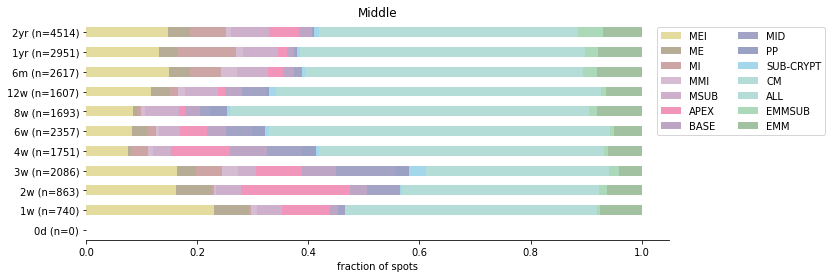

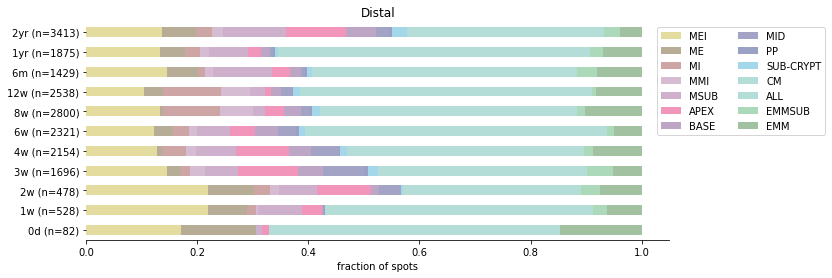

In [129]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '1yr', '2yr']

for reg in ['Proximal', 'Middle', 'Distal']:
    obs = adata_lambdas.obs[adata_lambdas.obs.Region == reg]
    
    counts_per_type = dict([(ct, []) for ct in mroi_colors.keys()])
    n_per_age = []
    
    for a in ages:
        if a.endswith('w'):
            obs_age = obs[obs.Age == a]
        elif a == '0d':
            obs_age = obs[obs.Age == '0w']
        elif a == '6m':
            obs_age = obs[obs.Age == '26w']
        elif a == '1yr':
            obs_age = obs[obs.Age == '52w']
        elif a == '2yr':
            obs_age = obs[obs.Age == '104w']
        else:
            raise ValueError
        n_per_age.append(len(obs_age))
        
        for mroi in mroi_colors.keys():
            if len(obs_age) > 0:
                counts_per_type[mroi].append(np.sum(obs_age.annotation == mroi_short2long[mroi]) / len(obs_age))
            else:
                counts_per_type[mroi].append(0)
        
    df_cpt = pd.DataFrame(counts_per_type, index=ages)
    
    ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,4), color=mroi_colors)
    ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(0.97, 1.0))
    ax.set_xlabel('fraction of spots')
    ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
    ax.spines[['left', 'right', 'top']].set_visible(False)
    ax.set_title(reg)
    
    plt.subplots_adjust(right=0.8)
    plt.savefig('fig1_stdata_composition_%s.svg' % reg, format='SVG')
    plt.show()

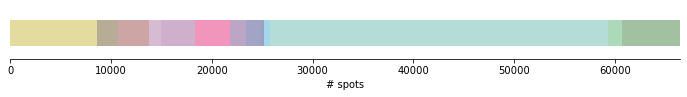

In [11]:
# One-line version of above

counts_per_mroi = {}
for mroi in mroi_colors.keys():
    counts_per_mroi[mroi] = [np.sum(adata_lambdas.obs['annotation'] == mroi_short2long[mroi])]

df_mroi = pd.DataFrame(counts_per_mroi)

ax = df_mroi.plot(kind='barh', stacked=True, figsize=(12,1.5), color=mroi_colors, legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_mroi.svg')

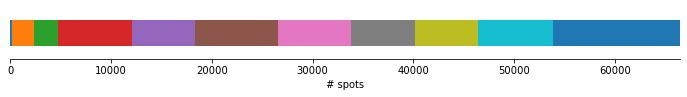

In [18]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '1yr', '2yr']
obs = adata_lambdas.obs

counts_per_age = {}
for a in ages:
    if a.endswith('w'):
        obs_age = a
    elif a == '0d':
        obs_age = '0w'
    elif a == '6m':
        obs_age = '26w'
    elif a == '1yr':
        obs_age = '52w'
    elif a == '2yr':
        obs_age = '104w'
    else:
        raise ValueError
    counts_per_age[a] = [np.sum(adata_lambdas.obs['Age'] == obs_age)]

df_age = pd.DataFrame(counts_per_age)

ax = df_age.plot(kind='barh', stacked=True, figsize=(12,1.5), legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_age.svg')

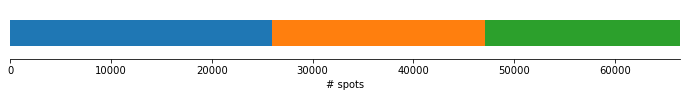

In [19]:
counts_per_reg = {}
for reg in ['Proximal', 'Middle', 'Distal']:
    counts_per_reg[reg] = [np.sum(adata_lambdas.obs['Region'] == reg)]

df_reg = pd.DataFrame(counts_per_reg)

ax = df_reg.plot(kind='barh', stacked=True, figsize=(12,1.5), legend=False)
ax.set_xlabel('# spots')
ax.set_xlim(0, len(adata_lambdas.obs))
ax.set_yticks([])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(bottom=0.4)
plt.savefig('fig1_stdata_composition_oneline_region.svg')

### Supplement: breakdown of snRNA-seq dataset by cell type and age group

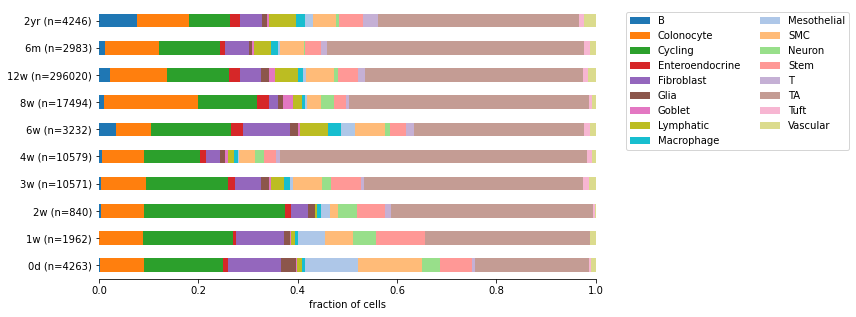

In [149]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '2yr']

counts_per_type = dict([(ct, []) for ct in pmaj_colors.keys()])
n_per_age = []

for a in ages:
    obs = adata_snrna.obs[adata_snrna.obs.age == a]
    n_per_age.append(len(obs))
    for ct in pmaj_colors.keys():
        counts_per_type[ct].append(np.sum(obs['pheno_major_cell_types'] == ct) / len(obs))

df_cpt = pd.DataFrame(counts_per_type, index=ages)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,5), color=pmaj_colors)
ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('fraction of cells')
ax.set_xlim(0, 1)
ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(right=0.7)
plt.savefig('sfig1_sndata_composition_k17.svg', format='SVG')
plt.show()

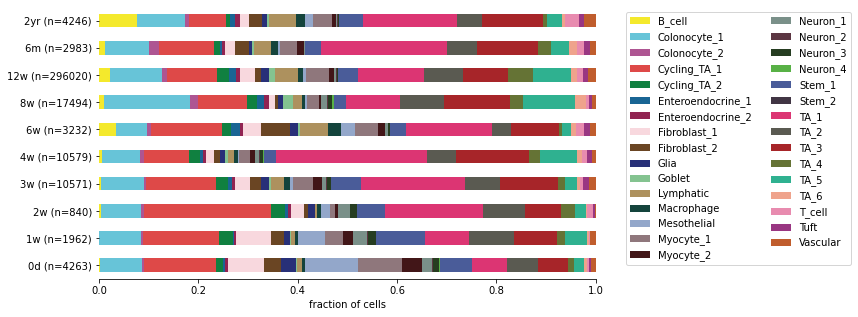

In [29]:
ages = ['0d', '1w', '2w', '3w', '4w', '6w', '8w', '12w', '6m', '2yr']

counts_per_type = dict([(ct, []) for ct in p_colors.keys()])
n_per_age = []

for a in ages:
    obs = adata_snrna.obs[adata_snrna.obs.age == a]
    n_per_age.append(len(obs))
    for ct in p_colors.keys():
        counts_per_type[ct].append(np.sum(obs['pheno_cell_types'] == ct) / len(obs))

df_cpt = pd.DataFrame(counts_per_type, index=ages)

ax = df_cpt.plot(kind='barh', stacked=True, figsize=(12,5), color=p_colors)
ax.legend(ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax.set_xlabel('fraction of cells')
ax.set_xlim(0, 1)
ax.set_yticklabels(['%s (n=%d)' % (a,n) for a,n in zip(ages, n_per_age)])
ax.spines[['left', 'right', 'top']].set_visible(False)

plt.subplots_adjust(right=0.7)
plt.savefig('sfig1_sndata_composition_k31.svg', format='SVG')
plt.show()

### Supplement: breakdown of ST data by condition, MROI

In [44]:
out_dir = 'fig1'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

In [25]:
obs = adata_lambdas.obs
obs['array'] = [x.split('/')[1].split('_stdata')[0] for x in obs.index]
row_list = []

for arr in obs.array.unique():
    obs_arr = obs[obs.array == arr]
    row = [obs_arr.Age[0], obs_arr.Region[0], obs_arr.Sex[0]]
                
    for mroi in obs.annotation.unique():
        row.append(np.sum(obs_arr.annotation == mroi))

    row_list.append(row)

df_stcomp = pd.DataFrame(row_list, 
                         index=obs.array.unique(), 
                         columns=['Age', 'Region', 'Sex'] + ['# %s' % x for x in obs.annotation.unique()])
df_stcomp = df_stcomp.sort_values(['Age', 'Region', 'Sex'])
df_stcomp.to_csv(os.path.join(out_dir, 'Extended_Data_Table1_1.csv'))

/var/folders/2y/rfyy59b10y1bdnyzxhgdcf9w0000gn/T/ipykernel_81159/3759088114.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row = [obs_arr.Age[0], obs_arr.Region[0], obs_arr.Sex[0]]


In [26]:
row_list = []
for age in obs.Age.unique():
    obs_age = obs[obs.Age == age]
    for reg in obs.Region.unique():
        obs_reg = obs_age[obs_age.Region == reg]
        for sex in obs.Sex.unique():
            obs_sex = obs_reg[obs_reg.Sex == sex]

            n_spots = obs_sex.shape[0]
            n_arr = len(obs_sex.array.unique())
            row_list.append([age, reg, sex, n_arr, n_spots])

df_stcomp2 = pd.DataFrame(row_list, columns=['Age', 'Region', 'Sex', '# arrays', '# spots'])
df_stcomp2 = df_stcomp2.sort_values(['Age', 'Region', 'Sex'])
df_stcomp2.to_csv(os.path.join(out_dir, 'Extended_Data_Table1_2.csv'))

In [28]:
# Cell counts (based on Sanja's ST AnnData)
adata_cellcount = sc.read_h5ad('/Users/aidandaly/Downloads/anndata_colons_norm_all_degenes_Nov2021.h5ad')

In [29]:
cell_count = []
for age in sorted(adata.obs.Age.cat.categories):
    obs2_age = adata_cellcount.obs[adata_cellcount.obs.Age == age]
    for reg in ['Distal', 'Middle', 'Proximal']:
        obs2_reg = obs2_age[obs2_age.Region == reg]
        for sex in ['F', 'M']:
            obs2_sex = obs2_reg[obs2_reg.Sex == sex]
            cell_count.append(obs2_sex.cell_count.sum())
df_stcomp2['# cell segments'] = cell_count
df_stcomp2.to_csv(os.path.join(out_dir, 'Extended_Data_Table1_2.csv'))

### Supplement: Top DE genes per cell type

In [30]:
adata_snrna_pp = sc.pp.normalize_total(adata_snrna, 1e4, copy=True)
sc.pp.log1p(adata_snrna_pp)

In [34]:
sc.tl.rank_genes_groups(adata_snrna_pp, 'pheno_major_cell_types', n_genes=5)

TypeError: rank_genes_groups_df() missing 1 required positional argument: 'group'

/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


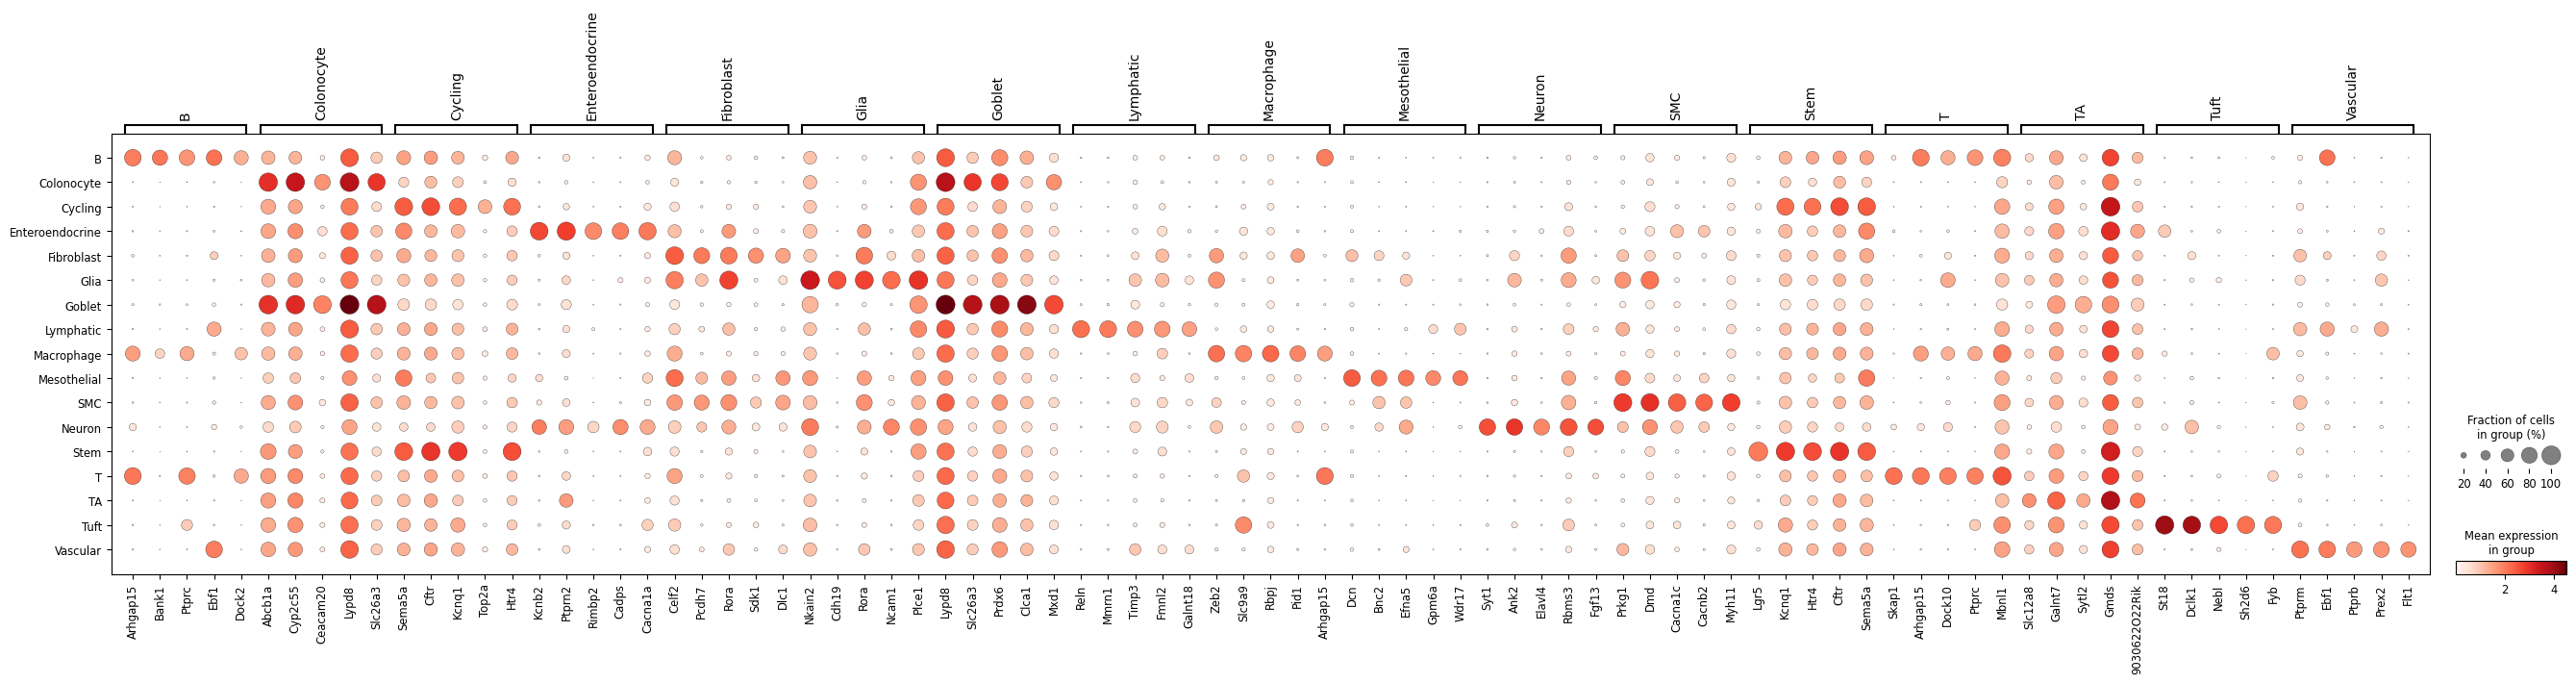

In [46]:
marker_genes_dict = {}
for ct in sorted(adata_snrna_pp.obs.pheno_major_cell_types.cat.categories):
    marker_genes_dict[ct] = sc.get.rank_genes_groups_df(adata_snrna_pp, ct)['names'].values

sc.pl.dotplot(adata_snrna_pp, marker_genes_dict, 'pheno_major_cell_types', dendrogram=False, show=False)
plt.savefig(os.path.join(out_dir, 'sfig1_pheno_major_cell_types_markers.svg'))

/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/aidandaly/miniforge3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


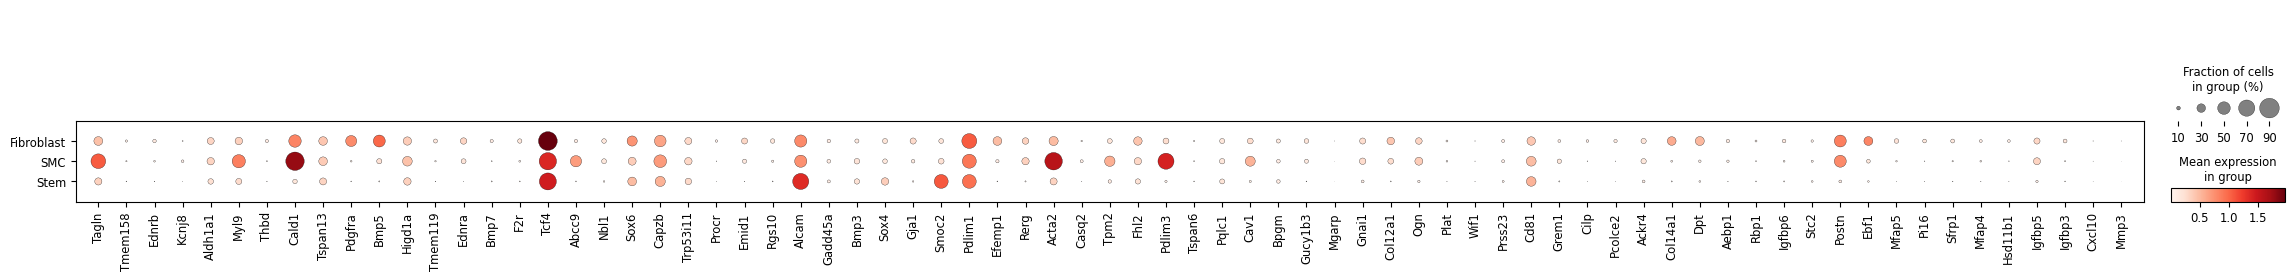

In [53]:
genes = ['Tagln',
'Tmem158',
'Ednrb',
'Kcnj8',
'Aldh1a1',
'Myl9',
'Thbd',
'Cald1',
'Tspan13',
'Pdgfra',
'Bmp5',
'Higd1a',
'Tmem119',
'Ednra',
'Bmp7',
'F2r',
'Tcf4',
'Abcc9',
'Nbl1',
'Sox6',
'Capzb',
'Trp53i11',
'Procr',
'Emid1',
'Rgs10',
'Alcam',
'Gadd45a',
'Bmp3',
'Sox4',
'Gja1',
'Smoc2',
'Pdlim1',
'Efemp1',
'Rerg',
'Acta2',
'Casq2',
'Tpm2',
'Fhl2',
'Pdlim3',
'Tspan6',
'Pqlc1',
'Cav1',
'Bpgm',
'Gucy1b3',
'Mgarp',
'Gnai1',
'Col12a1',
'Ogn',
'Plat',
'Wif1',
'Prss23',
'Cd81',
'Grem1',
'Cilp',
'Pcolce2',
'Ackr4',
'Col14a1',
'Dpt',
'Aebp1',
'Rbp1',
'Igfbp6',
'Stc2',
'Postn',
'Ebf1',
'Mfap5',
'Pi16',
'Sfrp1',
'Mfap4',
'Hsd11b1',
'Igfbp5',
'Igfbp3',
'Cxcl10',
'Mmp3']

adata_sub = adata_snrna_pp[adata_snrna_pp.obs.pheno_major_cell_types.isin(['SMC', 'Fibroblast', 'Stem']), :]
sc.pl.dotplot(adata_sub, genes, 'pheno_major_cell_types', show=False)
plt.savefig(os.path.join(out_dir, 'sfig1_fibro_markers.svg'))